In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
%matplotlib inline

**Single Regression Examples**

In [2]:
sr_dataset = pd.read_csv('/content/drive/MyDrive/IST347/Week_3/Salary_Data.csv')  # load the salary dataset 

In [3]:
sr_X = sr_dataset.iloc[:,:-1].values
sr_y = sr_dataset.iloc[:,-1].values

Split the data into training and testing set

In [4]:
#from sklearn.model_selection import train_test_split
sr_X_train, sr_X_test, sr_y_train, sr_y_test = train_test_split(sr_X,sr_y,test_size = 0.2, random_state=1)

Training the simple regression model



In [5]:
# from sklearn.linear_model import LinearRegression
lr_sr = LinearRegression()
lr_sr.fit(sr_X_train, sr_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print(lr_sr.intercept_)

25609.89799835482


In [7]:
print(lr_sr.coef_)

[9332.94473799]


Predicting the test set results

In [8]:
sr_y_pred=lr_sr.predict(sr_X_test)
print('this is the prediction result', sr_y_pred)
print('this is the actual result', sr_y_test)

this is the prediction result [75074.50510972 91873.8056381  62008.38247653 81607.56642631
 67608.14931932 89073.92221671]
this is the actual result [83088. 98273. 63218. 93940. 61111. 91738.]


In [9]:
sr_x_pred = lr_sr.predict(sr_X_train)

Visualize the training set result

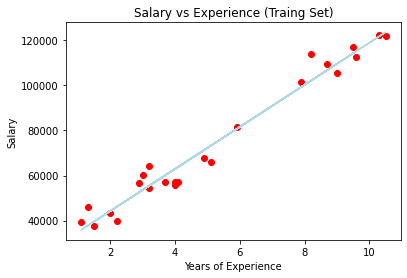

In [10]:
plt.scatter(sr_X_train,sr_y_train,color='red') # plot the scatter data in red
plt.plot(sr_X_train,sr_x_pred,color='lightblue') # plot the regression line
plt.title('Salary vs Experience (Traing Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualize the test set result

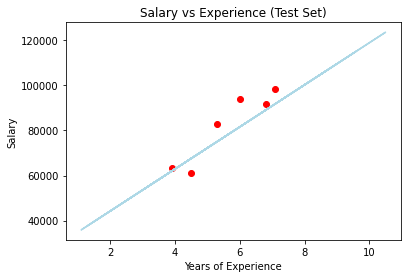

In [11]:
plt.scatter(sr_X_test,sr_y_test,color='red') # plot the scatter data in red
plt.plot(sr_X_train,sr_x_pred,color='lightblue') # plot the regression line
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Seeing the prediction versus actial in test data

In [12]:
np.set_printoptions(precision = 2)
print(np.concatenate((sr_y_pred.reshape(len(sr_y_pred),1), sr_y_test.reshape(len(sr_y_test),1)),1))

[[75074.51 83088.  ]
 [91873.81 98273.  ]
 [62008.38 63218.  ]
 [81607.57 93940.  ]
 [67608.15 61111.  ]
 [89073.92 91738.  ]]


**Multiple Regression Examples**

In [13]:
mr_dataset = pd.read_csv('/content/drive/MyDrive/IST347/Week_3/50_Startups.csv')

In [14]:
mr_X = mr_dataset.iloc[:,:-1].values
mr_y = mr_dataset.iloc[:,-1].values
#print(mr_X)

quick tips to create X , y  

In [15]:
mr_dataset.columns
# Select the columns manually
# X = dataset[['R&D Spend','Administration','Marketing Spend', 'State']].values
# y = dataset['Profit'].values

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Encodign Categorical Data

In [16]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough') # 3 was the index of the traget column with categorical data
mr_X = np.array(ct.fit_transform(mr_X))

In [17]:
#print(mr_X)

Split the dataset into training and testing

In [18]:
mr_X_train, mr_X_test, mr_y_train, mr_y_test = train_test_split(mr_X, mr_y, test_size = 0.2, random_state = 0)

Training the Multiple Linear Regression model on the Training set

In [19]:
#from sklearn.linear_model import LinearRegression
lr_mr = LinearRegression()
lr_mr.fit(mr_X_train, mr_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict the test results

In [20]:
lr_mr.intercept_

42467.52924853204

In [21]:
lr_mr.coef_

array([ 8.66e+01, -8.73e+02,  7.86e+02,  7.73e-01,  3.29e-02,  3.66e-02])

In [22]:
mr_y_pred = lr_mr.predict(mr_X_test)
print(mr_y_pred)

[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]


In [23]:
print(mr_y_test)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


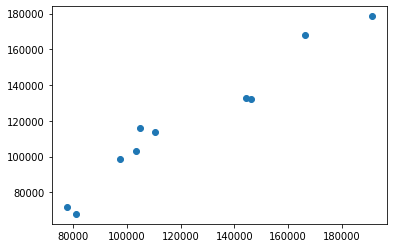

In [24]:
plt.scatter(mr_y_test, mr_y_pred)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


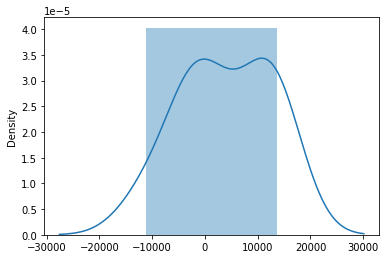

In [25]:
sns.distplot(mr_y_test-mr_y_pred)
plt.show()

In [26]:
#y_pred = lm.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((mr_y_pred.reshape(len(mr_y_pred),1), mr_y_test.reshape(len(mr_y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Show the metrics error

In [28]:
#from sklearn import metrics
metrics.mean_absolute_error(mr_y_test, mr_y_pred)

7514.2936596433165

In [29]:
metrics.mean_squared_error(mr_y_test, mr_y_pred)

83502864.03256583

In [30]:
np.sqrt(metrics.mean_squared_error(mr_y_test, mr_y_pred))

9137.990152794313

In [31]:
metrics.r2_score(mr_y_test, mr_y_pred)

0.9347068473282515